<a href="https://colab.research.google.com/github/Navin321-alma/Face-Emotion-Recognition/blob/main/fer_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mounting to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing libraries
import numpy as np 
import pandas as pd 
import cv2

In [3]:
df = pd.read_csv('/content/drive/MyDrive/facial expression/fer2013/fer2013.csv')

In [4]:
# it gives first five rows of dataset 
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [5]:
# length of a pixels 
len(df.iloc[0]['pixels'].split())
# 48 * 48

2304

In [6]:
# labelling of emotion
label_map = ['Anger', 'Neutral', 'Fear', 'Happy', 'Sad', 'Surprise']

In [7]:
import matplotlib.pyplot as plt

In [8]:
img = df.iloc[0]['pixels'].split()

In [9]:
img = [int(i) for i in img]

In [10]:
type(img[0])

int

In [11]:
len(img)

2304

In [12]:
img = np.array(img)

In [13]:
img = img.reshape(48,48)

In [14]:
img.shape

(48, 48)

Text(0.5, 0, '0')

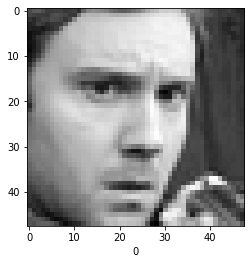

In [15]:
#plotting a image 
plt.imshow(img, cmap='gray')
plt.xlabel(df.iloc[0]['emotion'])

In [16]:
X = []
y = []

In [17]:
# setting different labels to different emotion
def getData(path):
    anger = 0
    fear = 0
    sad = 0
    happy = 0
    surprise = 0
    neutral = 0
    df = pd.read_csv(path)
    
    X = []
    y = []    
    
    for i in range(len(df)):
        if df.iloc[i]['emotion'] != 1:
            if df.iloc[i]['emotion'] == 0:
                if anger <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    anger += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 2:
                if fear <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    fear += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 3:
                if happy <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    happy += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 4:
                if sad <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    sad += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 5:
                if surprise <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    surprise += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 6:
                if neutral <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    neutral += 1
                else:
                    pass

            
            
    return X, y  
    

In [18]:
# generating new dataset
X, y = getData('/content/drive/MyDrive/facial expression/fer2013/fer2013.csv')

In [19]:
np.unique(y, return_counts=True)

(array([0, 2, 3, 4, 5, 6]), array([4001, 4001, 4001, 4001, 4001, 4001]))

In [20]:
X = np.array(X)/255.0
y = np.array(y)

In [21]:
# shape of X and y
X.shape, y.shape

((24006, 2304), (24006,))

In [22]:
y_o = []
for i in y:
    if i != 6:
        y_o.append(i)
        
    else:
        y_o.append(1)

In [23]:
np.unique(y_o, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([4001, 4001, 4001, 4001, 4001, 4001]))

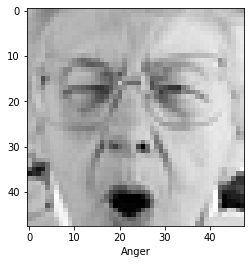

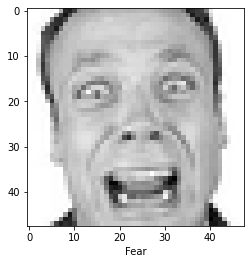

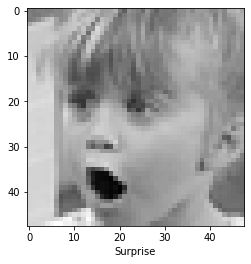

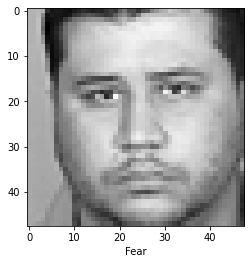

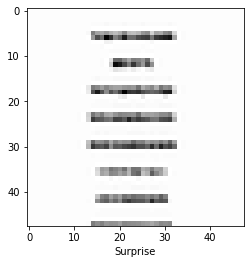

In [24]:
# plotting five different images with their emotions name
for i in range(5):
    r = np.random.randint((1), 24000, 1)[0]
    plt.figure()
    plt.imshow(X[r].reshape(48,48), cmap='gray')
    plt.xlabel(label_map[y_o[r]])

In [25]:
X = X.reshape(len(X), 48, 48, 1)

In [26]:
# no_of_images, height, width, coloar_map

In [27]:
X.shape

(24006, 48, 48, 1)

In [28]:
from tensorflow.keras.utils import to_categorical
y_new = to_categorical(y_o, num_classes=6)

In [29]:
len(y_o), y_new.shape

(24006, (24006, 6))

In [30]:
y_o[150], y_new[150]

(0, array([1., 0., 0., 0., 0., 0.], dtype=float32))

#Making Training and Validation Data

In [31]:
# importing libraries for creating model
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from tensorflow.keras.layers import BatchNormalization

In [32]:
# adding convolutional layers with activation functions (relu) and max pooling
model = Sequential()


input_shape = (48,48,1)


model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model.add(Conv2D(64, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(Conv2D(128, (5, 5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

## (15, 15) --->  30
model.add(Flatten())
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [33]:
# printing model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       2

#Fitting the Model with Training and Validation Data

In [34]:
# running epochs 
history = model.fit(X, y_new, epochs=25, batch_size=64, shuffle=True, validation_split=0.2)

Epoch 1/25
301/301 [==============================] - 64s 106ms/step - loss: 2.2084 - accuracy: 0.2428 - val_loss: 2.9751 - val_accuracy: 0.1006
Epoch 2/25
301/301 [==============================] - 31s 103ms/step - loss: 1.7087 - accuracy: 0.3249 - val_loss: 2.5030 - val_accuracy: 0.1622
Epoch 3/25
301/301 [==============================] - 31s 103ms/step - loss: 1.5058 - accuracy: 0.4108 - val_loss: 1.7042 - val_accuracy: 0.3126
Epoch 4/25
301/301 [==============================] - 31s 103ms/step - loss: 1.4056 - accuracy: 0.4531 - val_loss: 2.4477 - val_accuracy: 0.2307
Epoch 5/25
301/301 [==============================] - 31s 103ms/step - loss: 1.3061 - accuracy: 0.4942 - val_loss: 2.0353 - val_accuracy: 0.2884
Epoch 6/25
301/301 [==============================] - 31s 103ms/step - loss: 1.2288 - accuracy: 0.5234 - val_loss: 1.4024 - val_accuracy: 0.4788
Epoch 7/25
301/301 [==============================] - 31s 103ms/step - loss: 1.1553 - accuracy: 0.5512 - val_loss: 1.3141 - val_ac

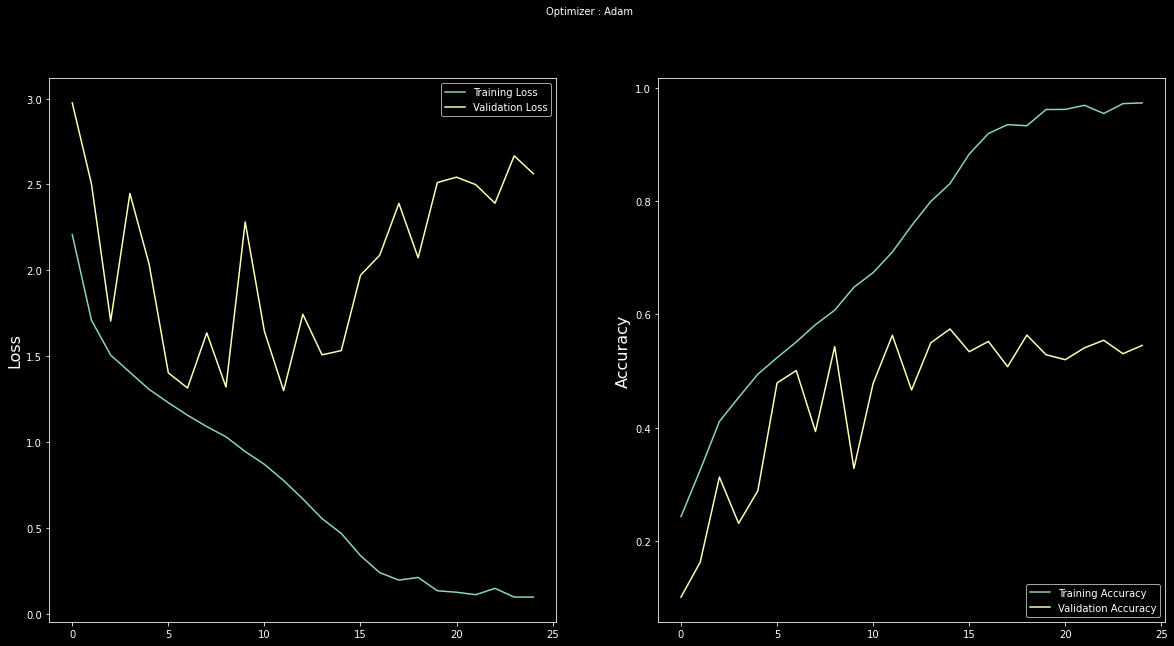

In [35]:
# plotting losses and accuracy of train and validation
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [36]:
# saving the model as a .h5 file
model.save('model_final.h5')

In [37]:
model.save('model_final.json')

INFO:tensorflow:Assets written to: model_final.json/assets


In [41]:
model_json = model.to_json()
with open("model1.json","w") as json_file:
     json_file.write(model_json)

files.download("model1.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Testing 

In [ ]:
# Testing with different images
import cv2
test_img = cv2.imread('/content/drive/MyDrive/facial expression/dwayne (1).jpg', 0)

In [ ]:
test_img.shape

(840, 441)

In [ ]:
test_img = cv2.resize(test_img, (48,48))
test_img.shape

(48, 48)

In [ ]:
test_img = test_img.reshape(1,48,48,1)

Actual image is angry and prediction is also angry

In [ ]:
#angry face predicting
model.predict(test_img)

array([[1., 0., 0., 0., 0., 0.]], dtype=float32)

# label_map = ['Anger', 'Neutral', 'Fear', 'Happy', 'Sad', 'Surprise']

In [ ]:
test_img2 = cv2.imread("/content/drive/MyDrive/happy_face.jpg",0)

In [ ]:
test_img2.shape

(339, 509)

In [ ]:
test_img2 = cv2.resize(test_img2, (48,48))
test_img2.shape

(48, 48)

In [ ]:
test_img2 = test_img2.reshape(1,48,48,1)

Actual image is happy and prediction image is also happy

In [ ]:
#Happy face predicting
model.predict(test_img2)

array([[0., 0., 0., 1., 0., 0.]], dtype=float32)